In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alien-vs-predator-images/data/train/predator/51.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/103.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/187.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/104.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/60.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/209.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/298.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/237.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/181.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/229.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/240.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/153.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/110.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/45.jpg
/kaggle/input/alien-vs-predator-images/data/train/predator/147.jp

/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/51.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/60.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/45.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/41.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/20.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/64.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/24.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/65.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/63.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation/alien/53.jpg
/kaggle/input/alien-vs-predato

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import torchvision as vision
import torchvision.datasets as DS
import torchvision.transforms as transforms

In [62]:
trans=transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor()
    
])

In [63]:
ds=DS.ImageFolder(root="/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train",transform=trans)
ds

Dataset ImageFolder
    Number of datapoints: 694
    Root location: /kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [64]:
i,j=ds[0]
i.shape

torch.Size([3, 256, 256])

In [65]:
dl=DataLoader(ds,batch_size=69,shuffle=True,pin_memory=True,num_workers=2)

In [66]:
for i in dl:
    print(i)
    break

[tensor([[[[0.9765, 0.9765, 0.9765,  ..., 0.8510, 0.8706, 0.8392],
          [0.9765, 0.9765, 0.9765,  ..., 0.8745, 0.8941, 0.8627],
          [0.9765, 0.9765, 0.9765,  ..., 0.8941, 0.9137, 0.8824],
          ...,
          [0.9765, 0.9765, 0.9765,  ..., 0.9961, 0.9882, 0.9961],
          [0.9765, 0.9765, 0.9765,  ..., 0.9922, 0.9804, 0.9686],
          [0.9765, 0.9765, 0.9765,  ..., 0.9882, 0.9725, 0.9333]],

         [[0.9804, 0.9804, 0.9804,  ..., 0.8235, 0.8431, 0.8118],
          [0.9804, 0.9804, 0.9804,  ..., 0.8471, 0.8667, 0.8353],
          [0.9804, 0.9804, 0.9804,  ..., 0.8667, 0.8863, 0.8549],
          ...,
          [0.9804, 0.9804, 0.9804,  ..., 0.8353, 0.8157, 0.8196],
          [0.9804, 0.9804, 0.9804,  ..., 0.8275, 0.8196, 0.8000],
          [0.9804, 0.9804, 0.9804,  ..., 0.8196, 0.8235, 0.7804]],

         [[0.9882, 0.9882, 0.9882,  ..., 0.7922, 0.8118, 0.7804],
          [0.9882, 0.9882, 0.9882,  ..., 0.8157, 0.8353, 0.8039],
          [0.9882, 0.9882, 0.9882,  ..., 

tensor([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])
torch.Size([69, 3, 256, 256])


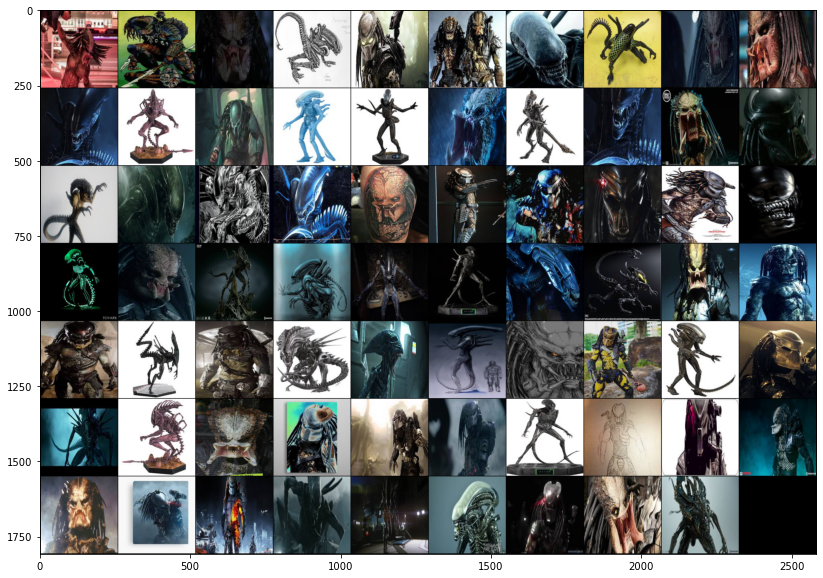

In [67]:
for i,j in dl:
    plt.figure(figsize=(20,10))
    plt.imshow(make_grid(i,nrow=10).permute((1,2,0)))
    print(j)
    print(i.shape)
    break

In [68]:
class Cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(3,8,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(8,18,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(18,28,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(28*32*32,164),
            nn.ReLU(),
            nn.Linear(164,128),
            nn.ReLU(),
            nn.Linear(128,112),
            nn.ReLU(),
            nn.Linear(112,89),
            nn.ReLU(),
            nn.Linear(89,49),
            nn.ReLU(),
            nn.Linear(49,29),
            nn.ReLU(),
            nn.Linear(29,9),
            nn.ReLU(),
            nn.Linear(9,2),
                        
        )
    def forward(self,xb):
        return self.layer(xb)

In [69]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [70]:
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device)
    

In [71]:
class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
        for i in self.dl:
            yield to_device(i,self.device)
    def __len__(self):
        return len(self.dl)

In [72]:
dl=DeviceDataLoader(dl,device)

In [73]:
for i in dl:
    print(i)
    break

[tensor([[[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 

In [74]:
model=Cnn()
to_device(model,device)

Cnn(
  (layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(18, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten()
    (10): Linear(in_features=28672, out_features=164, bias=True)
    (11): ReLU()
    (12): Linear(in_features=164, out_features=128, bias=True)
    (13): ReLU()
    (14): Linear(in_features=128, out_features=112, bias=True)
    (15): ReLU()
    (16): Linear(in_features=112, out_features=89, bias=True)
    (17): ReLU()
    (18): Linear(in_features=89, out_features=49, bias=True)
    (19): ReLU()
    (20): Linear(in_features=49,

In [75]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [76]:
for i,j in dl:
    print(i.shape)
    pred=model(i)
    loss=F.cross_entropy(pred,j)
    acc=accuracy(pred,j)
    break

torch.Size([69, 3, 256, 256])


In [77]:
loss.item()

0.6894581913948059

In [78]:
f"accuracy={int(acc*100)}%"

'accuracy=60%'

In [79]:
def fit(epoch,lr,model,loss,data):
#     optim=torch.optim.SGD(model.parameters(),lr=lr)
    optim=torch.optim.Adam(model.parameters(),lr=lr)
    for x in range(epoch):
        for i,j in data:
            pred=model(i)
            ls=loss(pred,j)
            ls.backward()
            optim.step()
            optim.zero_grad()
            acc=accuracy(pred,j)
        print(f"loss={ls} acc={acc}")
            
    

In [80]:
loss=F.cross_entropy

In [89]:
fit(10,0.00001,model,loss,dl)

loss=0.6932996511459351 acc=0.5
loss=0.7021095752716064 acc=0.25
loss=0.684487521648407 acc=0.75
loss=0.693324089050293 acc=0.5
loss=0.7108690142631531 acc=0.0
loss=0.7021198272705078 acc=0.25
loss=0.693294882774353 acc=0.5
loss=0.6757428646087646 acc=1.0
loss=0.6932847499847412 acc=0.5
loss=0.6932941675186157 acc=0.5


In [82]:
val=DS.ImageFolder(root="/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation",transform=trans)

In [83]:

val

Dataset ImageFolder
    Number of datapoints: 200
    Root location: /kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [84]:
vl=DataLoader(val,batch_size=69,shuffle=True,pin_memory=True,num_workers=2)

In [85]:
def val(model,loss,data):
    with torch.no_grad():
        for i,j in data:
            pred=model(i)
            ls=loss(pred,j)
            acc=accuracy(pred,j)
            print(f"loss={ls} acc={acc}")
    return pred

    

In [86]:
vl=DeviceDataLoader(vl,device)

In [87]:
val(model,loss,vl)

KeyboardInterrupt: 

In [ ]:
for i in vl:
    dta=i
    break

In [ ]:
dta[1][0]

In [ ]:
img=dta[0][0].cpu()
plt.imshow(img.permute((1,2,0)))